### Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt

### Heat Equation Solver Function (Dufort-Frankel)

In [17]:
def solve_heat_equation_dufort_frankel(L, k, T, nx, nt):
    """
    Solves the 1D heat equation using the Dufort-Frankel method.

    Parameters:
    L: Length of the rod.
    k: Thermal diffusivity of the material.
    T: Total time to simulate.
    nx: Number of spatial points.
    nt: Number of time steps.

    Returns:
    tuple: A tuple containing:
        - x: Array of spatial points.
        - u: The numerical solution for temperature distribution at the final time.
        - u_analytical: The analytical solution at the final time.
    """
    # Discretization
    dx = L / (nx - 1)
    dt = T / nt
    x = np.linspace(0, L, nx)
    r = k * dt / dx**2

    # Initial condition: a sine wave
    def initial_condition(x_val):
        return np.sin(np.pi * x_val / L)

    # Initialize temperature array
    u = np.zeros((nt, nx))
    u[0, :] = initial_condition(x)

    # The Dufort-Frankel scheme needs values from two previous time steps.
    u[1, 1:-1] = u[0, 1:-1] + r * (u[0, 2:] - 2 * u[0, 1:-1] + u[0, :-2])

    # Boundary conditions (already 0 from initialization)
    u[:, 0] = 0
    u[:, -1] = 0

    # Time-stepping loop
    for j in range(1, nt - 1):
        for i in range(1, nx - 1):
            term1 = (1 - 2 * r) * u[j - 1, i]
            term2 = 2 * r * (u[j, i + 1] + u[j, i - 1])
            denominator = 1 + 2 * r
            u[j + 1, i] = (term1 + term2) / denominator


    # Analytical solution for comparison
    def analytical_solution(x_val, t_val):
        return np.exp(-k * (np.pi / L)**2 * t_val) * np.sin(np.pi * x_val / L)

    u_analytical = analytical_solution(x, T)

    return x, u[-1, :], u_analytical

### Plotting Function

In [18]:
def plot_results_gradient(L, T, nx, nt, u_numerical, u_analytical):
    """
    Plots the numerical solution as a temperature gradient on a time-position plot
    and the error between numerical and analytical solutions.

    Parameters:
    L: Length of the rod.
    T: Total time to simulate.
    nx: Number of spatial points.
    nt: Number of time steps.
    u_numerical: Numerical solution for temperature distribution at all time steps.
    u_analytical: The analytical solution at the final time.
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot 1: Temperature gradient plot
    x = np.linspace(0, L, nx)
    t = np.linspace(0, T, nt)
    X, T_grid = np.meshgrid(x, t)

    ax.contourf(T_grid, X, u_numerical, 100, cmap='hot')
    ax.set_title('Heat Equation: Temperature Distribution (Numerical Solution)')
    ax.set_xlabel('Time')
    ax.set_ylabel('Position along the rod (x)')
    plt.colorbar(ax.contourf(T_grid, X, u_numerical, 100, cmap='hot'), label='Temperature')

    plt.tight_layout()
    plt.show()

    # Plot 2: Error between Numerical and Analytical Solutions
    fig, ax2 = plt.subplots(figsize=(10, 5))
    x = np.linspace(0, L, nx)
    error = u_numerical[-1, :] - u_analytical
    ax2.plot(x, error, 'g-', label='Error (Numerical - Analytical)', linewidth=2)
    ax2.set_title('Error Analysis at Final Time')
    ax2.set_xlabel('Position along the rod (x)')
    ax2.set_ylabel('Error')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

### Simulation Parameters

In [19]:
# --- Simulation Parameters ---
L = 1.0      # Length of the rod
k = 0.01     # Thermal diffusivity
T = 10.0     # Total simulation time

# Discretization parameters
nx = 51      # Number of spatial points
nt = 1001    # Number of time steps

### Solve and Plot

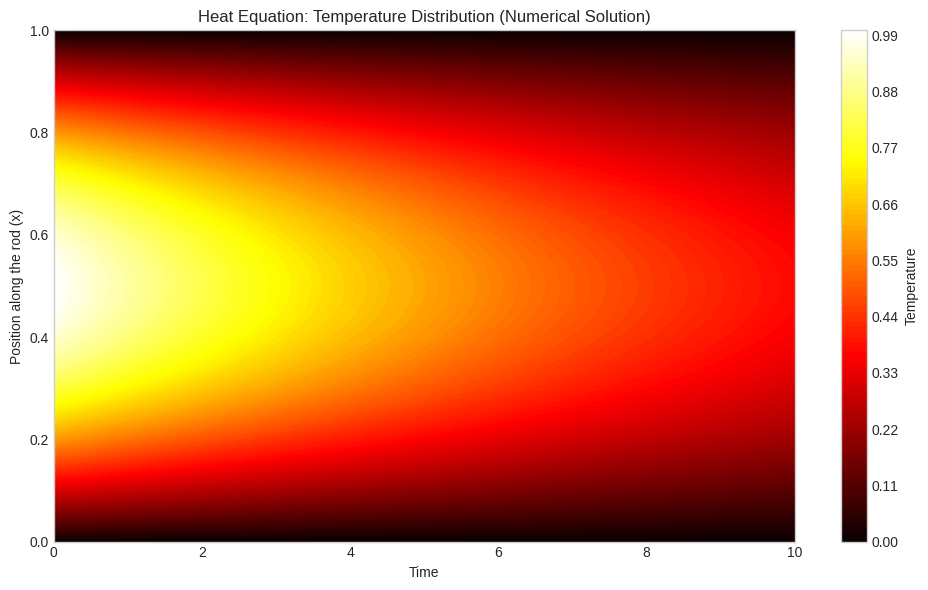

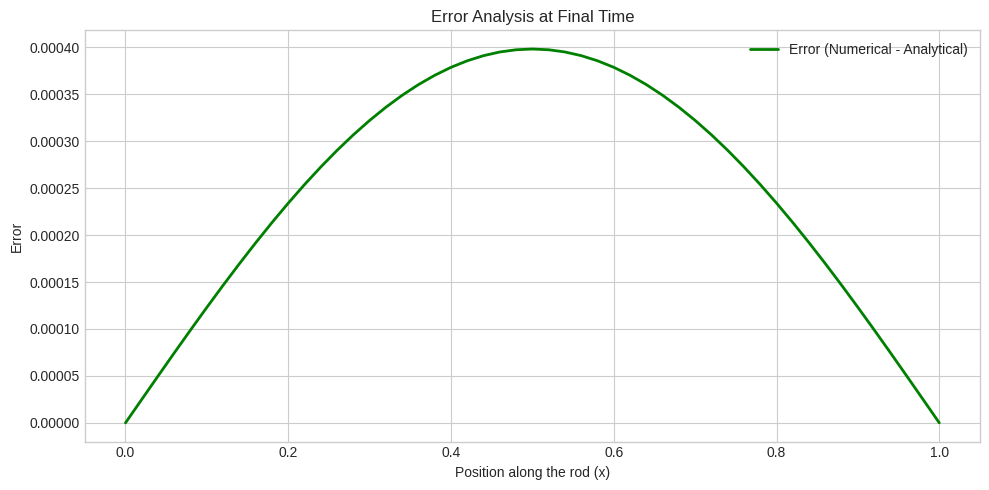

In [20]:
# Solve the equation
x, u_numerical_final, u_analytical = solve_heat_equation_dufort_frankel(L, k, T, nx, nt)

# Need to re-run solve_heat_equation_dufort_frankel to get all time steps for the gradient plot
def solve_heat_equation_dufort_frankel_all_timesteps(L, k, T, nx, nt):
    """
    Solves the 1D heat equation using the Dufort-Frankel method and returns
    the solution at all time steps.

    Parameters:
    L: Length of the rod.
    k: Thermal diffusivity of the material.
    T: Total time to simulate.
    nx: Number of spatial points.
    nt: Number of time steps.

    Returns:
    tuple: A tuple containing:
        - x: Array of spatial points.
        - u: The numerical solution for temperature distribution at all time steps.
        - u_analytical_final: The analytical solution at the final time.
    """
    # Discretization
    dx = L / (nx - 1)
    dt = T / nt
    x = np.linspace(0, L, nx)
    r = k * dt / dx**2

    # Initial condition: a sine wave
    def initial_condition(x_val):
        return np.sin(np.pi * x_val / L)

    # Initialize temperature array
    u = np.zeros((nt, nx))
    u[0, :] = initial_condition(x)

    # The Dufort-Frankel scheme needs values from two previous time steps.
    u[1, 1:-1] = u[0, 1:-1] + r * (u[0, 2:] - 2 * u[0, 1:-1] + u[0, :-2])

    # Boundary conditions (already 0 from initialization)
    u[:, 0] = 0
    u[:, -1] = 0

    # Time-stepping loop
    for j in range(1, nt - 1):
        for i in range(1, nx - 1):
            term1 = (1 - 2 * r) * u[j - 1, i]
            term2 = 2 * r * (u[j, i + 1] + u[j, i - 1])
            denominator = 1 + 2 * r
            u[j + 1, i] = (term1 + term2) / denominator


    # Analytical solution for comparison at the final time
    def analytical_solution(x_val, t_val):
        return np.exp(-k * (np.pi / L)**2 * t_val) * np.sin(np.pi * x_val / L)

    u_analytical_final = analytical_solution(x, T)

    return x, u, u_analytical_final

x, u_numerical_all_timesteps, u_analytical = solve_heat_equation_dufort_frankel_all_timesteps(L, k, T, nx, nt)

# Plot the results
plot_results_gradient(L, T, nx, nt, u_numerical_all_timesteps, u_analytical)

### Calculate and Print Error

In [21]:
mae = np.mean(np.abs(u_numerical - u_analytical))
print(f"Mean Absolute Error: {mae:.6f}")

Mean Absolute Error: 0.000248
